In [1]:
import cv2 as cv
import random
import numpy as np
import sklearn as sk
import math
from matplotlib import pyplot as plt

my_SIFT_instance = cv.SIFT_create()

In [2]:
img1 = cv.imread("backpack_right.png")
img2 = cv.imread("backpack_left.png")
lena1 = cv.imread("lena.png")
lena2 = cv.imread("lena.png")
sift = cv.SIFT_create()

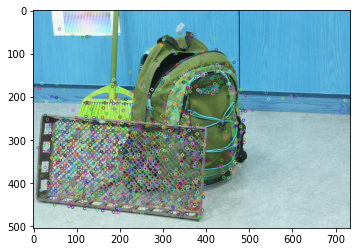

In [3]:
kp1, d1 = sift.detectAndCompute(img1,None)
kp2, d2 = sift.detectAndCompute(img2,None)
b1 = np.zeros((img1.shape))
b2 = np.zeros((img2.shape))
b1 = cv.drawKeypoints(img1, kp1, b1)
b2 = cv.drawKeypoints(img2, kp2, b2)
plt.imshow(b1)

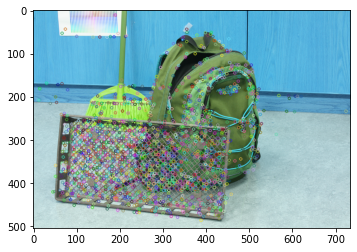

In [4]:
plt.imshow(b2)

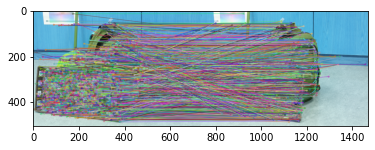

In [5]:
bf = cv.BFMatcher()
matches = bf.knnMatch(d1,d2,k=2)
BF = cv.drawMatchesKnn(img1,kp1,img2,kp2,matches,None)
plt.imshow(BF)

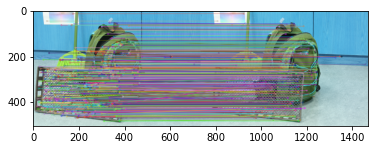

In [6]:
good = []
for m,n in matches:
    if(m.distance < 0.75*n.distance):
        good.append([m])

img3BF = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=2)
plt.imshow(img3BF)

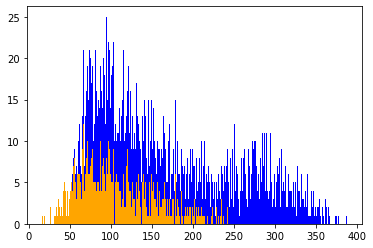

In [7]:
allmatches = dict()
for m,n in matches:
    if( (round(m.distance) in allmatches)):
        allmatches[round(m.distance)] += 1
    else:
        allmatches[round(m.distance)] = 1
lowMatches = dict()
for m in good:
    if( (round(m[0].distance) in lowMatches)):
        lowMatches[round(m[0].distance)] += 1
    else:
        lowMatches[round(m[0].distance)] = 1
plt.bar(allmatches.keys(), allmatches.values(), 1, color='b')
plt.bar(lowMatches.keys(), lowMatches.values(), 1, color='orange')
plt.show()

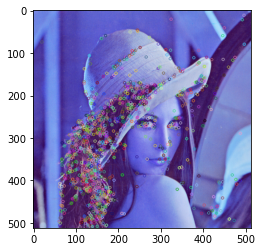

In [8]:
lkp1, lenad1 = sift.detectAndCompute(lena1,None)
lkp2, lenad2 = sift.detectAndCompute(lena2,None)
lenaa = np.zeros((lena1.shape))
lenab = np.zeros((lena2.shape))
lenaa = cv.drawKeypoints(lena1, lkp1, lenaa)
lenab = cv.drawKeypoints(lena2, lkp2, lenab)
plt.imshow(lenaa)

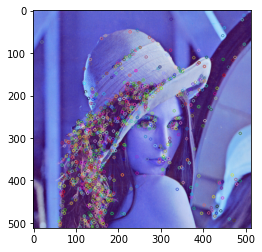

In [9]:
plt.imshow(lenab)

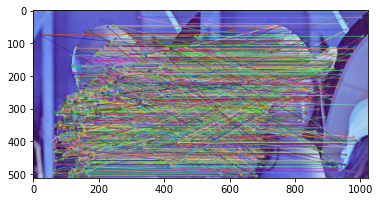

In [10]:
lenaMatches = bf.knnMatch(lenad1,lenad2,k=2)
lenaBF = cv.drawMatchesKnn(lena1,lkp1,lena2,lkp2,lenaMatches,None)

plt.imshow(lenaBF)

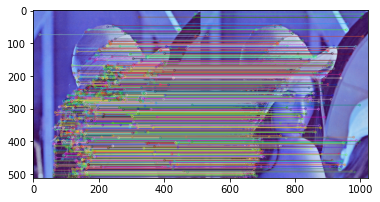

In [11]:
lenagood = []
for m,n in lenaMatches:
    if(m.distance < 0.75*n.distance):
        lenagood.append([m])

lenaimgBF = cv.drawMatchesKnn(lena1,lkp1,lena2,lkp2,lenagood,None,flags=2)
plt.imshow(lenaimgBF)

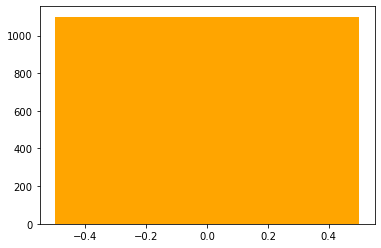

In [12]:
lenaAll = dict()
for m,n in lenaMatches:
    if( (round(m.distance) in lenaAll)):
        lenaAll[round(m.distance)] += 1
    else:
        lenaAll[round(m.distance)] = 1
lenaLM = dict()
for m in lenagood:
    if( (round(m[0].distance) in lenaLM)):
        lenaLM[round(m[0].distance)] += 1
    else:
        lenaLM[round(m[0].distance)] = 1
plt.bar(lenaAll.keys(), lenaAll.values(), 1, color='b')
plt.bar(lenaLM.keys(), lenaLM.values(), 1, color='orange')
plt.show()